In [1]:
#importing libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ab_data.csv')
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [3]:
#checking various datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
# Checking to see if there are any users in control that saw new page and users in treatment that saw old page
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [5]:
# Removing control/new_page and treatment/old_page
df_cleaned = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'old_page') | (df['group'] == 'treatment') & (df['landing_page']== 'new_page')]
                    
df_cleaned.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [6]:
# Checking for duplicate values
df_cleaned['user_id'].duplicated().sum()

1

In [7]:
#Found a duplicate.Finding user_id for duplicate value
df_cleaned[df_cleaned.duplicated(['user_id'],keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [8]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [9]:
#Deleting the duplicate
df_cleaned = df.drop_duplicates(subset='user_id', keep="first")

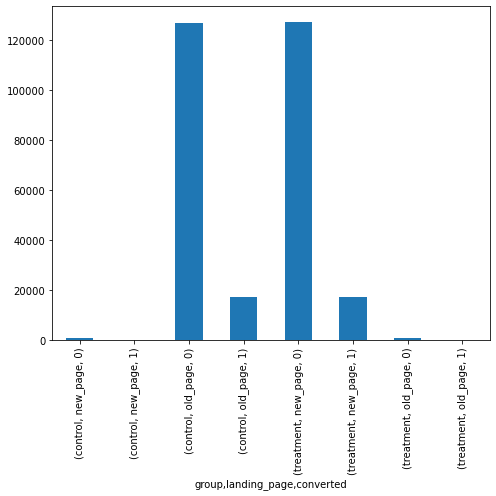

In [10]:
groups = df_cleaned.groupby(['group','landing_page','converted']).size()
plt.figure(figsize=(7,7))
groups.plot.bar()
plt.tight_layout()

<AxesSubplot:ylabel='landing_page'>

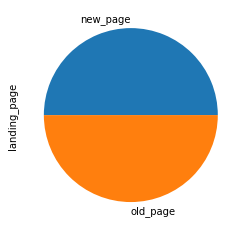

In [11]:
#visualizing the users based on their web page 
df_cleaned['landing_page'].value_counts().plot.pie()

In [13]:
### Re-arrrange data into 2x2 for Chi-Squared

# 1) Split groups into two separate DataFrames
a = df_cleaned[df_cleaned['group'] == 'control']
b = df_cleaned[df_cleaned['group'] == 'treatment']

# 2) A-click, A-noclick, B-click, B-noclick
a_click = a.converted.sum()
a_noclick = a.converted.size - a.converted.sum()
b_click = b.converted.sum()
b_noclick = b.converted.size - b.converted.sum()

# 3) Create np array
T = np.array([[a_click, a_noclick], [b_click, b_noclick]])

In [14]:
import scipy
from scipy import stats
print(scipy.stats.chi2_contingency(T,correction=False)[1])

0.22689933216132585


In [15]:
a_CTR = a_click / (a_click + a_noclick)
b_CTR = b_click / (b_click + b_noclick)
print(a_CTR, b_CTR)

0.12029717968491792 0.11884253398646046
